In [1]:
!pip install sqlalchemy
!pip install psycopg2
!pip install psycopg2-binary

     |████████████████████████████████| 2.9MB 4.9MB/s 


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from scipy.stats.stats import ttest_ind
from sqlalchemy import create_engine
import warnings



# import warnings
warnings.filterwarnings('ignore')

In [0]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

studentsperf_df = pd.read_sql_query('select * from studentsperformance',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [4]:
#explore the dataset
studentsperf_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
studentsperf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Text(0.5, 1.0, 'histogram of writing score')

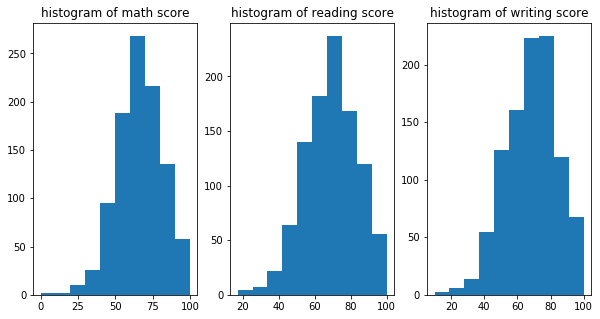

In [6]:
#1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
plt.figure(figsize=(10,5))

# histograms of the original data
plt.subplot(1, 3, 1)
plt.hist(studentsperf_df["math score"])
plt.title("histogram of math score")

plt.subplot(1, 3, 2)
plt.hist(studentsperf_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(1, 3, 3)
plt.hist(studentsperf_df["writing score"])
plt.title("histogram of writing score")


# Applying Box-Cox



In [7]:
# Use the Jarque-Bera and Normal tests
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(studentsperf_df["math score"])
norm_stats = normaltest(studentsperf_df["math score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(studentsperf_df["reading score"])
norm_stats = normaltest(studentsperf_df["reading score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(studentsperf_df["writing score"])
norm_stats = normaltest(studentsperf_df["writing score"])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


In [0]:

#The answer the distribution is not normal

In [0]:
#Apply the Box-Cox transformation.

In [0]:
from scipy.stats import boxcox
math_score_boxcox,_= boxcox(studentsperf_df[studentsperf_df["math score"] > 0]["math score"])
reading_score_boxcox,_= boxcox(studentsperf_df["reading score"])
writing_score_boxcox,_= boxcox(studentsperf_df["writing score"])


Before Box_Cox
After Box-Cox


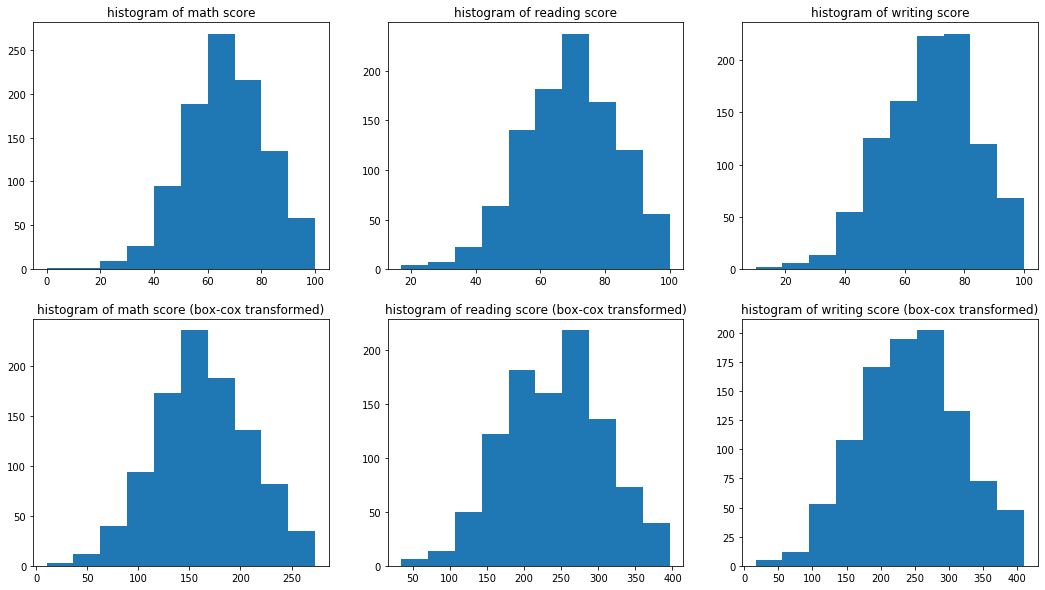

In [11]:
# histograms of the original data
#Before



plt.figure(figsize=(18,10))
print ("Before Box_Cox")
plt.subplot(2, 3, 1)
plt.hist(studentsperf_df["math score"])
plt.title("histogram of math score")

plt.subplot(2, 3, 2)
plt.hist(studentsperf_df["reading score"])
plt.title("histogram of reading score")

plt.subplot(2, 3, 3)
plt.hist(studentsperf_df["writing score"])
plt.title("histogram of writing score")


print("After Box-Cox")
plt.subplot(2, 3, 4)
plt.hist(math_score_boxcox)
plt.title("histogram of math score (box-cox transformed)")

plt.subplot(2, 3, 5)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading score (box-cox transformed)")

plt.subplot(2, 3, 6)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing score (box-cox transformed)")

plt.show()


In [12]:
# Now use the Jarque-Bera and Normal tests after Box-Cox
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.7200982636836308 and p value is 0.42314129209599327
Normality test statistics is 1.8323075851586939 and p value is 0.4000547794685686
Jarque-Bera test statistics is 4.119778573559666 and p value is 0.127468081515408
Normality test statistics is 5.282274606965809 and p value is 0.07128015626992971
Jarque-Bera test statistics is 4.746478090042761 and p value is 0.09317842784043195
Normality test statistics is 6.267311355052559 and p value is 0.04355827085003712


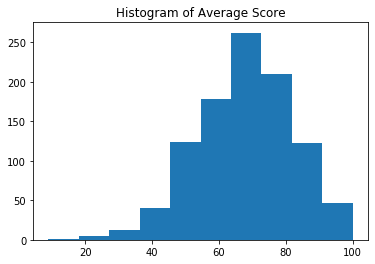

Jarque-Bera test statistics is 15.453387913085168 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [13]:
#2.Say we want to use a single variable for the exam scores as our target. 
#For this purpose, create a new variable by taking a weighted average of the exam scores.
# Check whether this new variable is normally distributed. If it's not normally distributed, 
#apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

mean_score=(studentsperf_df["math score"]+ studentsperf_df["reading score"] + studentsperf_df['writing score'])/3
plt.hist(mean_score)
plt.title("Histogram of Average Score")
plt.show()

#test whether distribution is normal using Jarque-Bera and Normality test
jb_stats = jarque_bera(mean_score)
norm_stats = normaltest(mean_score)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))




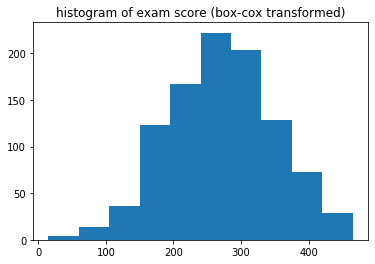

Jarque-Bera test statistics is 2.4353989331279 and p value is 0.2959101356398447
Normality test statistics is 2.779857602227616 and p value is 0.24909303914726724


In [14]:
#apply box-cox
 exams_boxcox,_ = boxcox(mean_score)

 plt.hist(exams_boxcox)
plt.title("histogram of exam score (box-cox transformed)")
plt.show()

jb_stats = jarque_bera(exams_boxcox)
norm_stats = normaltest(exams_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

In [0]:
# The variable is now normally distriuted

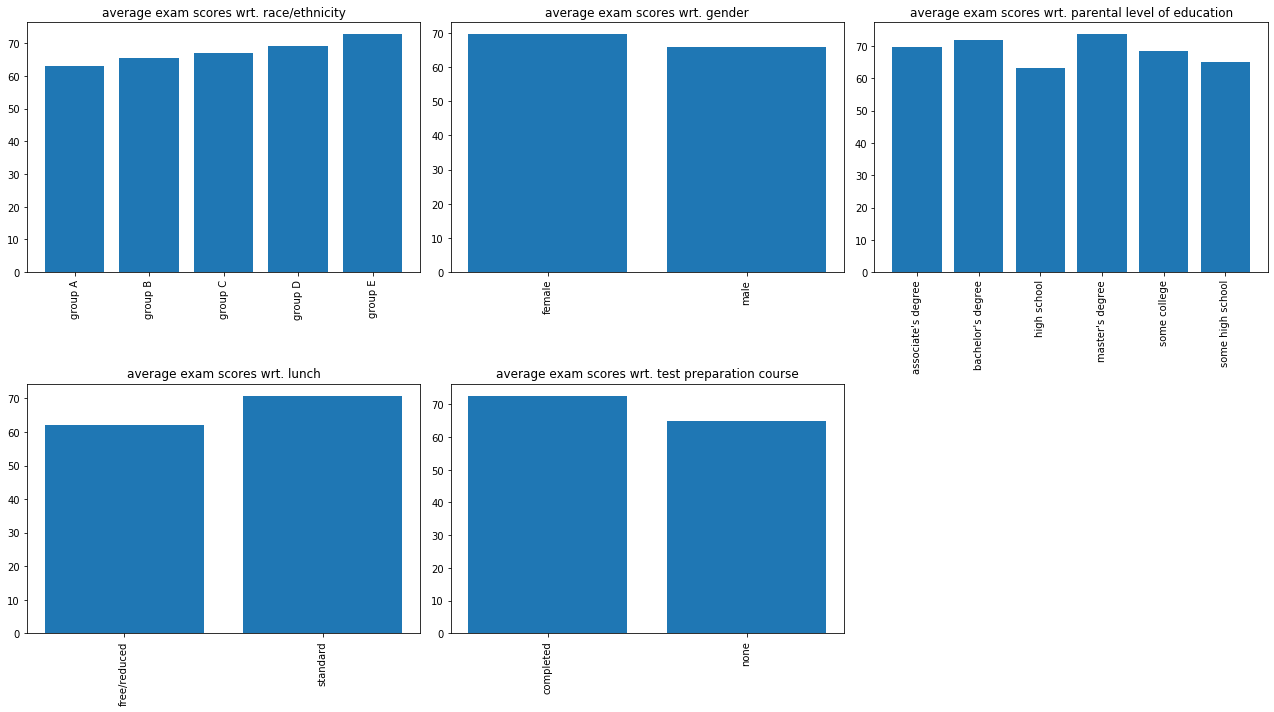

In [23]:
#3.Which variables seem related to the target variable (the newly created variable in the previous question)? 
#If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

studentsperf_df["mean_score"] = mean_score

plt.figure(figsize=(18, 10))
plt.subplot(2, 3, 1)
plt.bar(studentsperf_df.groupby("race/ethnicity")
        ["mean_score"].mean().index, studentsperf_df.groupby("race/ethnicity")["mean_score"].mean())
plt.title("average exam scores wrt. race/ethnicity")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(studentsperf_df.groupby("gender")
        ["mean_score"].mean().index, studentsperf_df.groupby("gender")["mean_score"].mean())

plt.title("average exam scores wrt. gender")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(studentsperf_df.groupby("parental level of education")
        ["mean_score"].mean().index, studentsperf_df.groupby("parental level of education")["mean_score"].mean())

plt.title("average exam scores wrt. parental level of education")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(studentsperf_df.groupby("lunch")
        ["mean_score"].mean().index, studentsperf_df.groupby("lunch")["mean_score"].mean())

plt.title("average exam scores wrt. lunch")
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(studentsperf_df.groupby("test preparation course")
        ["mean_score"].mean().index, studentsperf_df.groupby("test preparation course")["mean_score"].mean())

plt.title("average exam scores wrt. test preparation course")
plt.xticks(rotation="vertical")
plt.tight_layout()
plt.show()